# Simulated Annealing Algorithm 



This notebook is the code for exercice 5.4. 

We first have to implement Simulated Annealing Algorithm A.19 modified and applied to Example 5.5, which is interested in the function :

$$ h(x) = [\cos(50x) + \sin(20x)]^2 $$

We define function $h$ : 

In [1]:
import numpy as np

def h(x):
    return (np.cos(50*x) + np.sin(20*x))**2

We now define a function $\texttt{simulate}$ , which takes $x^{(t)}, \rho^{(t)}, r $ and the function $T(t)$ as a parameter.  

In [2]:
def simulate(x, t, rho, r, T, h):
    """
    Simulate function takes x_t at time t and some parameters as an input and returns x_t+1, according to the Simulated
    Annealing algorithm.
    
    Args:
        x: x_t
        t: time
        rho: probability function of the Simulated Annealing Algorithm.
        r: interval parameter for uniform draws
        T: temperature function
        h: the objective function
    
    Returns: 
        x: x_t+1
    """
    # Define interval for time t
    a = max(x-r, 0)
    b = min(x+r, 1)
    
    # Simulate u drawn from Uniform(a, b)
    u=np.random.uniform(a, b)
    
    # Define probability
    prob = rho(t, x, u, T, h)
    
    # Accept or reject x_t+1
    A = np.random.binomial(1, prob)
    if A == 1:
        return u
    else:
        return x

We now define the chosen functions for $\rho^{(t)}, T(t)$ in the Example 5.5. : 

In [3]:
def rho(t, x, u, T, h):
    """
    Rho function from Example 5.5, giving probability to accept or reject the new x_t+1
    
    Args:
        t: time
        x: x_t
        u: the simulated u at time t
        T: the T(t) function
        h: the objective function
    
    Returns:
        rh: the probability to accept or reject the new candidate at time t
    """
    e = np.exp((h(u) - h(x))/T(t))
    rh = min(e, 1)
    return rh

def T(t):
    """
    Temperature function from Example 5.5
    
    Args:
        t: time
    
    Returns:
        T: the temperature at time t, T(t)
    """
    return 1/np.log(t)

Finally, we want a function $\texttt{simulate_n}$ which simulates $x_2, ..., x_n+1$ given some $x_1$, and $\texttt{plot_simulations}$, which plots the simulations:

In [4]:
def simulate_n(x0, n, rho, r, T, h):
    """
    Simulate a sequence of length n according to the Simulated Annealing algorithm.
    
    Args:
        x0: x_0
        n: number of simulations
        rho: probability function of the Simulated Annealing Algorithm.
        r: interval parameter for uniform draws
        T: temperature function
        h: the objective function
    
    Returns: 
        x: sequence of x_1, ..., x_n simulations
    """
    x = [x0]
    t = 2
    for i in range(n):
        old_x = x[-1]
        new_x = simulate(old_x, t, rho, r, T, h)
        x.append(new_x)
        t = t+1
    return x

In [5]:
import matplotlib.pyplot as plt
# %matplotlib inline

def plot_simulations(x1, n, rho, r, T, h):
    """
    Plots four sequences of length n according to the Simulated Annealing algorithm.
    
    Args:
        x1: x_1
        n: number of simulations
        rho: probability function of the Simulated Annealing Algorithm.
        r: interval parameter for uniform draws
        T: temperature function
        h: the objective function
    
    Returns: 
        None
    """
    
    fig = plt.figure()
    for i in range(1,5):
        nb = 220 + i
        ax = fig.add_subplot(nb)
        ax.set_xlim(left=0, right=1)
        x = simulate_n(x1, n, rho, r, T, h)
        y = [h(t) for t in x]
        plt.plot(x, y)
        plt.savefig('./plot1.png', quality = 100)
    plt.show()
    plt.close()
    

As in Example 5.5, take $r=0.5, n=2500, x_1=0$:

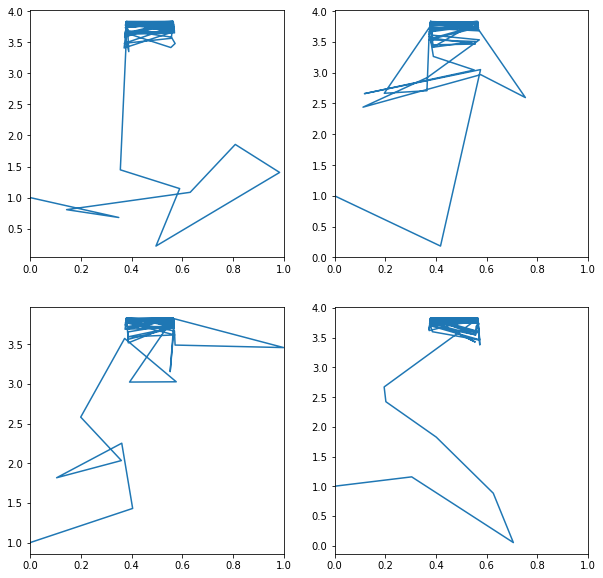

In [6]:
plt.rcParams["figure.figsize"] = (10, 10)
plot_simulations(x1=0,
                 n=2500,
                 rho=rho,
                 r=0.5,
                 T=T,
                 h=h)

Now, we change $T(t) = \frac{c}{\log(t)}$, and explore $r, c$:

In [7]:
def T_2(c):
    return lambda t: c/np.log(t)

In [8]:
r_range = [0.1, 0.25, 0.5, 0.75, 0.9]
c_range = [0.1, 0.25, 0.5, 0.75, 0.9]

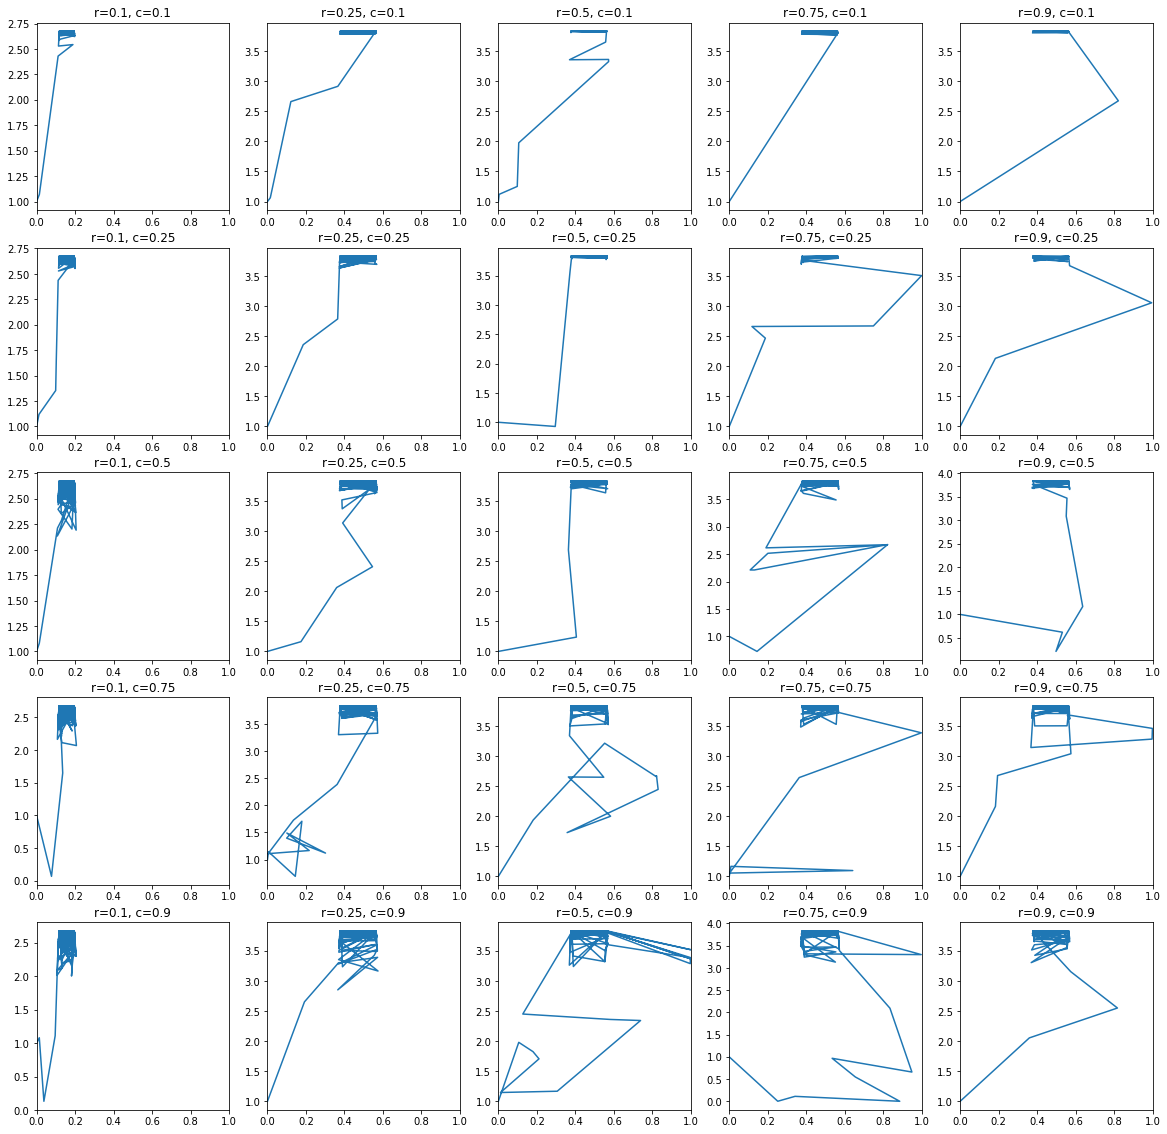

In [15]:
i=1
plt.rcParams["figure.figsize"] = (20, 20)
for c in c_range:
    for r in r_range:
        plt.subplot(5, 5, i)
        for i in range(4):
            x = simulate_n(x0=0,
                           n=2500,
                           rho=rho,
                           r=r,
                           T=T_2(c),
                           h=h)
            y = [h(t) for t in x]
            plt.plot(x, y, scalex=False)
        plt.title('r={0}, c={1}'.format(r, c))
        i=i+1
plt.savefig('./plot.png', quality=100)
plt.show()
